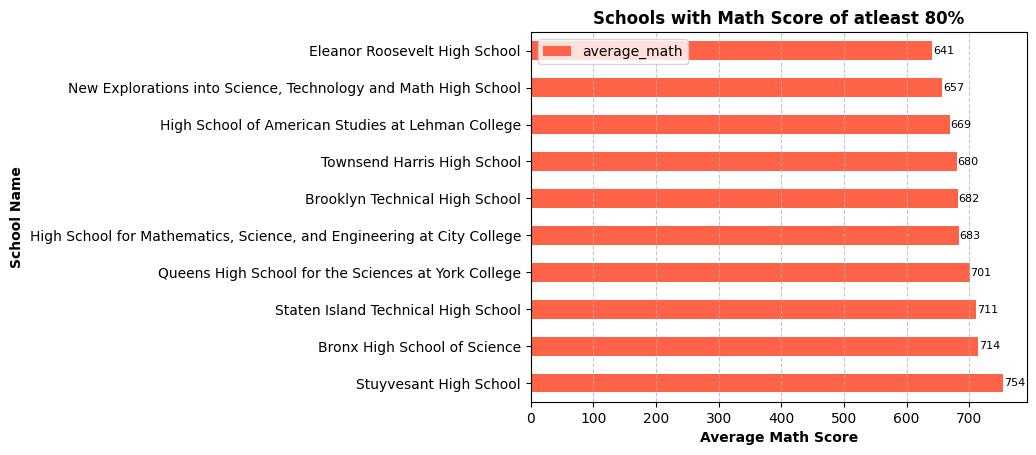

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

schools = pd.read_csv('schools.csv')

# Schools with math score of atleast 80%
best_math_schools = schools.loc[schools['average_math'] >= 0.8 * 800, ['school_name', 'average_math']]
best_math_schools.sort_values('average_math', ascending=False, inplace=True)

best_math_schools.plot(kind='barh', x='school_name', y='average_math', color='tomato')

plt.xlabel('Average Math Score', fontweight='bold')
plt.ylabel('School Name', fontweight='bold')
plt.title('Schools with Math Score of atleast 80%', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, value in enumerate(best_math_schools['average_math']):
  plt.text(value + 1, i, f'{value}', verticalalignment='center', fontsize=8)

plt.show()

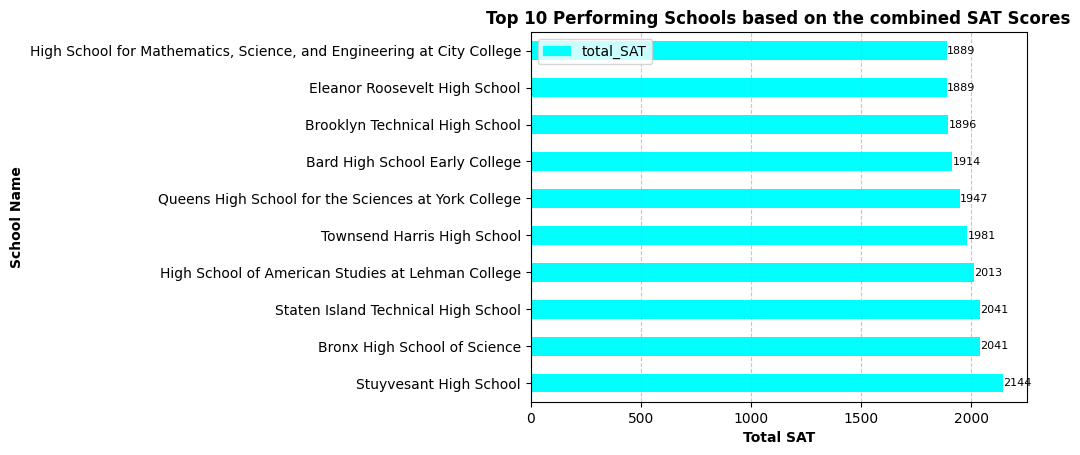

In [63]:
# axis=0 is column-wise (default)
# axis=1 is row-wise

# Top 10 performing schools based on the combined SAT scores

# Method 1
def getTotalSAT(row):
    return row['average_math'] + row['average_reading'] + row['average_writing']

schools['total_SAT'] = schools.apply(getTotalSAT, axis=1)

# Method 2
schools['total_SAT'] = schools[['average_math', 'average_reading', 'average_writing']].sum(axis=1)

top_10_schools = schools.loc[:, ['school_name', 'total_SAT']].sort_values('total_SAT', ascending=False).head(10)

top_10_schools.plot(kind='barh', x='school_name', y='total_SAT', color='aqua')

plt.xlabel('Total SAT', fontweight='bold')
plt.ylabel('School Name', fontweight='bold')
plt.title('Top 10 Performing Schools based on the combined SAT Scores', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, value in enumerate(top_10_schools['total_SAT']):
  plt.text(value + 1, i, f'{value}', verticalalignment='center', fontsize=8)

plt.show()

In [65]:
# Locating the NYC borough with the largest standard deviation in SAT performance
std_dev = schools.groupby('borough').agg({'school_name': 'count' ,'total_SAT': ['mean', 'std']})

largest_std_dev = std_dev[std_dev[('total_SAT', 'std')] == std_dev[('total_SAT', 'std')].max()]
largest_std_dev.columns = largest_std_dev.columns.map('_'.join)
largest_std_dev = largest_std_dev.rename(columns={'school_name_count': 'num_schools', 'total_SAT_mean': 'average_SAT', 'total_SAT_std': 'std_SAT'}).round(2)
largest_std_dev.head()

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29
